# Construção de um diagrama de Hertzsprung-Russell 

* PET - Física UFRN
* Petiano: Gabriel Wendell Celestino Rocha
* Data: 14 de Julho de 2021

O objetivo deste `Notebook` é ensinar ao leitor os aspectos gerais do diagrama de Hertzsprung-Russell, como construir este mesmo diagrama e posicionar diferentes classes de estrelas no mesmo.

Desta forma, para uma melhor organização deste `Notebook` como um todo, este será dividido em três seções: 
- **Introdução teórica**;
- **Trabalhando com dados reais**;
- **Melhorando a estética do diagrama**.

Na primeira seção iremos realizar uma breve introdução teórica sobre o assunto apresentando os conceitos gerais fundamentais para a construção do diagrama de Hertzsprung-Russell, além de apresentar o catálogo cujos dados serão utilizados na parte prática deste `Notebook`, e as equações que serão utilizadas, sem nos preocuparmos com as suas respectivas demonstrações.

A segunda seção será a primeira parte prática deste `Notebook`. Nela iremos explorar os dados do catálogo Hipparcos para então podermos construir o diagrama de Hertzsprung-Russell com base em dados reais.

Por fim, a terceira e última seção será a segunda parte prática deste `Notebook`. Nela iremos novamente construir um diagrama de Hertzsprung-Russell, porém dessa vez iremos utilizar o banco de dados HYG para a construção do mesmo. Além disso, iremos apresentar algumas técnicas e métodos que podem ser úteis para melhorar a estética dos seus diagramas.

## Pré-requisitos

Recomenda-se ao leitor que seja conhecedor da Física por trás do cor dos objetos celestes (você pode consultar um `Notebook` sobre o assunto na referência [2] ou clicando [aqui](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20cor%20dos%20objetos%20celestes.ipynb)). Além disso, é recomendável também que o leitor seja conhecedor dos fundamentos básicos da Astrofísica Estelar.

Uma atividade educacional interessante sobre os diagramas de Hertzsprung-Russell é o artigo sobre o tema no *Sloan Digital Sky Survey III - SkyServer* (SDSS III). Para isso, basta você consultar a referência [1] ou clicar [aqui](http://skyserver.sdss.org/dr16/en/proj/advanced/hr/hrhome.aspx).

### Importando as bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns                         
import pandas as pd
import numpy as np

%matplotlib notebook

Com relação à bilioteca `seaborn` (que será brevemente usada somente na seção 3) que importamos acima, você pode encontrar mais informações sobre a mesma checando a documentação dela [aqui](https://seaborn.pydata.org).

Vamos usar também a magic extension `%version_information` do `IPython` para gerar um quadro com as informações sobre quais versões das bibliotecas que foram usadas para executar este `Notebook`.

Você pode instalar a extensão `%version_information` usando o pip executando o seguinte comando no seu terminal :

`pip install version_information`

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy, Pandas, Seaborn

Software versions
Python 3.7.11 64bit [GCC 7.5.0]
IPython 7.23.1
OS Linux 5.4.0 80 generic x86_64 with Zorin 15 bionic
Matplotlib 3.4.2
Numpy 1.19.5
Pandas 1.2.4
Seaborn 0.11.1
Fri Nov 12 10:21:22 2021 -03

Dada essa explicação, vamos à parte teórica deste `Notebook`.

## 1. Introdução teórica

### 1.1 Aspectos gerais do diagrama

Os fatos relevantes para a elaboração de um diagrama de Hertzsprung-Russell (diagrama H-R em resumo) são os seguintes:

* Existe uma relação entre a magnitude absoluta de uma estrela e sua luminosidade, que foi descrita neste post: [A cor dos objetos celestes](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20cor%20dos%20objetos%20celestes.ipynb) [2].

* Há também uma relação entre a classe espectral da estrela (O B A F G K M), sua temperatura de superfície e seu índice de cor (por exemplo, B-V). Essa relação entre índice de cor e temperatura, assim como a relação entre classes espectrais e temperaturas podem ser consultadas no post da referência [2].

* O objetivo dos diagramas H-R é mostrar a relação entre os dois grupos dessas quantidades. O diagrama H-R "clássico" mostra a classe espectral das estrelas (ou seu índice de cor B-V correspondente) no eixo horizontal e as magnitude absolutas no eixo vertical.

* A posição de uma estrela no diagrama H-R nos diz algo sobre suas características. Assim, por exemplo, se uma estrela possui uma classe espectral que indica uma temperatura de superfície "fria", por exemplo, classes K e M, mas sua magnitude/luminosidade é alta, isso indica que a estrela tem uma superfície grande, o que significa que a alta superfície radiativa "compensa" a baixa intensidade de sua radiação devido à sua baixa temperatura. Ou seja, estaríamos diante de uma estrela "gigante" ou "supergigante". Como os índices de cores correnspondentes às temperaturas frias tendem para o vermelho, falaríamos neste caso, por exemplo, de gigantes vermelhas.

### 1.2 O catálogo HIPPARCOS

A maior dificuldade na construção de um diagrama H-R é determinar a luminosidade ou magnitude absoluta das estrelas, pois isso implica conhecer suas distâncias. Nesse sentido, o catálogo do SDSS (*Sloan Digital Sky Survey*) de objetos celestes não é adequado, pois seu objetivo principal é a fotometria de objetos extragalácticos, tendo poucas informações sobre as estrelas de nossa galáxia e, claro, carente de informações precisas das distâncias que nos separa deles.

Por isso, o catálogo de estrelas no qual vamos nos basear é o [HIPPARCOS](https://www.esa.int/Science_Exploration/Space_Science/Hipparcos_overview) [3], já que o objetivo principal desta missão era justamente fazer medições precisas de cerca de 120.000 estrelas. Além disso, a informação do referido catálogo inclui a classe espectral da grande maioria destes objetos, tornando-o a fonte mais adequada para a confecção de um diagrama H-R.

A descrição dos campos do catálogo pode ser baixada em formato pdf na seguinte página: [Hipparcos Overview](https://heasarc.gsfc.nasa.gov/W3Browse/all/hipparcos.html) [4]. Em particular, os seguintes campos serão relevantes para este `Notebook`:

* `H1` : Identificador no catálogo (HIP);
* `H5` : Magnitude no filtro V do sistema Johnson ($V_{mag}$);
* `H11` : Paralaxe trigonométrica em milissegundos de arco ($Plx$);
* `H37` : Índice de cor (B-V);
* `H76` : Tipo espectral (SpType).

As magnitudes absolutas serão calculadas a partir dos valores de $V$. Para isso, é possível partir da relação entre a magnitude absoluta $M$, a magnitude aparente $m$ e a paralaxe $p$ em segundos de arco (consulte o artigo presente na referência [5] ou clicando [aqui](https://astronomy.swin.edu.au/cosmos/A/Absolute+magnitude)):

$$\boxed{M=m+5(1+\log_{10}{p})}$$

Quando a paralaxe é expressa em milissegundos de arco ($Plx$), e tomando o valor $V$ do catálogo como a magnitude aparente, obtemos:

$$\boxed{M=V_{mag}+5\Bigg(1+\log_{10}\frac{Plx}{1000}\Bigg)}$$

Isso, simplificando, permanece:

$$\boxed{M=V_{mag}+5\cdot\log_{10}{\frac{Plx}{100}}}$$

$\text{ }$

## 2. Trabalhando com dados reais

Para baixar o catálogo, acesse a página de pesquisa [VizieR Search Page](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/239/hip_main) [6] do catálogo I/239 do *Centro de Dados Astronômicos de Estrasburgo* (CDS). Selecione apenas os campos indicados acima: HIP, Vmag, Plx, B-V, SpType. No painel esquerdo, em "Preferences" selecione "unlimited" e "; -Separated Values". Pressione o botão "Submit" e baixe o arquivo, que nomeei de `I_239_selection.tsv`, esse arquivo ocupa apenas 3,8 MB. Abri-lo com um editor de texto verifica se é um arquivo de texto com algumas linhas de cabeçalho explicando seu conteúdo, seguido por 118.322 entradas com os cinco campos selecionados pelo caratere " ; ". No final do arquivo existe uma linha em branco que devemos omitir ao ler o arquivo.

$$\texttt{Preferences}\rightarrow\texttt{unlimited}\rightarrow\texttt{; -Separated Values}\rightarrow\texttt{Submit}$$

A partir deste momento, assumiremos que o arquivo `I_239_selection.tsv` foi baixado e armazenado no mesmo diretório deste `Notebook`. A seguir, o arquivo será lido, criando um dataframe usando a biblioteca do `Pandas`.

In [3]:
filename = 'I_239_selection.tsv'
df = pd.read_table(filename, skiprows=44, sep=';', header=None, index_col=0,
                  names=['HIP', 'Vmag', 'Plx', 'B-V', 'SpType'],
                  skipfooter=1, engine='python')

Vamos dar uma olhada superficial no conteúdo do nosso dataframe:

In [4]:
df.head()

,Vmag,Plx,B-V,SpType
HIP,,,,
1,9.10,3.54,0.482,F5
2,9.27,21.90,0.999,K3V
3,6.61,2.81,-0.019,B9
4,8.06,7.75,0.370,F0V
5,8.55,2.87,0.902,G8III


In [5]:
df.tail()

,Vmag,Plx,B-V,SpType
HIP,,,,
118318,6.99,1.92,1.595,K2
118319,8.23,10.63,0.639,G2V
118320,7.59,5.00,0.999,K0
118321,9.20,19.22,0.698,G5V
118322,4.49,8.71,-0.075,B9IV


### 2.1 Preparação do dataframe dos dados

Agora vamos trabalhar neste dataframe. Primeiro, será analisado se há entradas no catálogo sem dados válidos (por exemplo, com valores `NaN`).

In [6]:
df.describe()

,Vmag,Plx,B-V,SpType
count,118218,118218,118218,115184
unique,1127,5617,2437,4124
top,8.69,,,K0
freq,504,263,1281,8570


O valor de `count` indica que das 118.322 entradas disponíveis no catálogo, faltam valores em cada uma das três colunas, que corresponderão a valores inexistentes (`NaN`). Vamos identificar e remover essas entradas.

Previamente iremos alterar qualquer campo com espaços para valores `NaN`, pois estes valores não são considerados pelo `Pandas` como `NaN`, mas mesmo assim devem ser eliminados já que será possível realizar cálculos (vamos utilizar um método que consiste em substituir valores em branco - espaços em branco - por `NaN` no `Pandas`).

**IMPORTANTE :** Antes de prosseguirmos, vamos a uma rápida explicação sobre as funções `lambda` no Python.

Uma forma interessão de definir as funções `lambda` é interpretá-las como funções anônimas. Enquanto funções normais podem ser criada utilizando `def` como prefixo, as funções `lambda` são criadas utilizando `lambda` (obviamente). Para criar uma função `lambda` basta utilizar a seguinte sintaxe:

$$\texttt{lambda}\text{ }\texttt{<argumento 1>,}\ldots\texttt{, <argumento n>}:\texttt{<expressão>}$$

Vale ressaltar que as funções `lambda` não utilizam a keyword `return` pois o retorno dentro de `lambda` é implícito.

Funções `lambda` funcionam da mesma forma que funções convencionais e, em geral, a escolha de adotar ou não seu uso é exclusivamente baseada em questões de estilo de código. No geral, é interessante utilizar as funções `lambda` quando se deseja definir funções de maneira rápida e enxuta e/ou quando não se usa a referida funções várias vezes no decorrer do código. 

É importante que o leitor esteja habituado com a sintaxe das funções `lambda` antes de prosseguir na leitura deste `Notebook`, uma vez que iremos utilizar essas funções de maneira exaustiva ao longo do mesmo.

Voltando ao noso dataframe...

In [7]:
df_clean = df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [8]:
df_clean.describe()

,Vmag,Plx,B-V,SpType
count,118217,117955,116937,115184
unique,1126,5616,2436,4124
top,8.69,2.93,1.000,K0
freq,504,183,317,8570


Pode-se verificar que os `count` são menores que as anteriores, o que significa que houve valores, principalmente na coluna `Plx`, com espaços, que não foram considerados como `NaN`. Agora eles estão todos marcados como `NaN` e, finalmente, todas as linhas contendo algum valor `NaN` serão removidas.

In [9]:
df_clean = df_clean.dropna()
df_clean.describe()

,Vmag,Plx,B-V,SpType
count,114472,114472,114472,114472
unique,1072,5361,2426,4070
top,8.69,2.93,1.000,K0
freq,502,182,308,8537


In [10]:
df_clean.shape

(114472, 4)

É verificado que o contador não nulo agora corresponde ao número de linhas no dataframe. De agora em diante, trabalharemos com o dataframe `df_clean`.

A seguir, a magnitude absoluta no filtro V será calculada usando a fórmula apresentada na seção anterior, que chamaremos de `M_V`. Uma coluna será adicionada ao dataframe, mas previamente as colunas do dataframe com o qual ele vai operar serão alteradas, convertendo-as de strings para valores numéricos.

In [11]:
df_clean['Vmag'] = df_clean['Vmag'].astype(np.float64)
df_clean['Plx'] = df_clean['Plx'].astype(np.float64)
df_clean['B-V'] = df_clean['B-V'].astype(np.float64)
df_clean['M_V'] = df_clean['Vmag'] + 5 * np.log10(df_clean['Plx']/100.)
df_clean.head()

/home/wendell/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/wendell/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Vmag,Plx,B-V,SpType,M_V
HIP,,,,,
1,9.10,3.54,0.482,F5,1.845016
2,9.27,21.90,0.999,K3V,5.972221
3,6.61,2.81,-0.019,B9,-1.146468
4,8.06,7.75,0.370,F0V,2.506509
5,8.55,2.87,0.902,G8III,0.839409


A seguir, estudaremos os tipos espectrais presentes no dataframe. A única informação realmente necessária no momento da coluna `SpType` são os dois primeiros caracteres. Além disso, apenas aqueles casos em que o primeiro caractere é alfabético e o segundo numérico, como G8 ou F5, são de interesse. Depois que as anomalias forem removidas, uma nova coluna será criada com apenas os dois primeiros caracteres.

As linhas que não atendem à condição `alfa + num` são eliminadas:

In [12]:
f = lambda s: (len(s) >= 2) and (s[0].isalpha()) and (s[1].isdigit())
i = df_clean['SpType'].apply(f)
df_clean = df_clean[i]

Uma nova coluna é criada com os dois primeiros caracteres de `SpType`:

In [13]:
f = lambda s: s[0:2]
df_clean['SpType2'] = df_clean['SpType'].apply(f)

Vamos checar o tamanho do nosso dataframe:

In [14]:
df_clean.shape

(111562, 6)

In [15]:
df_clean.head()

,Vmag,Plx,B-V,SpType,M_V,SpType2
HIP,,,,,,
1,9.10,3.54,0.482,F5,1.845016,F5
2,9.27,21.90,0.999,K3V,5.972221,K3
3,6.61,2.81,-0.019,B9,-1.146468,B9
4,8.06,7.75,0.370,F0V,2.506509,F0
5,8.55,2.87,0.902,G8III,0.839409,G8


Vamos ver quais são as classes espectrais presentes.

In [16]:
f = lambda s: s[0]
classes = df_clean['SpType'].map(f)
classes.value_counts()

K    31578
F    25201
G    22213
A    17651
B    10281
M     4212
O      256
C       82
N       48
R       23
S       17
Name: SpType, dtype: int64

As linhas com as classes especiais C, N, R e S serão eliminadas para permanecer apenas com aquelas da sequência OBAFGKM.

In [17]:
f = lambda s: s[0] in 'OBAFGKM'
df_clean = df_clean[df_clean['SpType'].map(f)]

Vamos comprovar que essas classes especiais foram realmente removidas:

In [18]:
f = lambda s: s[0]
classes = df_clean['SpType'].map(f)
classes.value_counts()

K    31578
F    25201
G    22213
A    17651
B    10281
M     4212
O      256
Name: SpType, dtype: int64

O objetivo é fazer um gráfico onde as classes espectrais do sistema Morgan-Keenan (MKK) aparecem no eixo horizontal: OBAFGKM, seguido de um dígito 0-9. Mas também se pretende que as classes espectrais apareçam ordenadas precisamente nesta ordem (B5 antes de A0...). Portanto, as letras serão substituídas por dígitos em sequência crescente na coluna `SpType2` para poder classificá-las através dessa coluna. Para isso, vamos definir uma variável chamada `order` que em realidade será um dicionário para o nosso código:

In [19]:
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
f = lambda s: order[s[0]] + s[1]
df_clean['SpType2'] = df_clean['SpType2'].apply(f)
df_clean.head()

,Vmag,Plx,B-V,SpType,M_V,SpType2
HIP,,,,,,
1,9.10,3.54,0.482,F5,1.845016,35
2,9.27,21.90,0.999,K3V,5.972221,53
3,6.61,2.81,-0.019,B9,-1.146468,19
4,8.06,7.75,0.370,F0V,2.506509,30
5,8.55,2.87,0.902,G8III,0.839409,48


### 2.2 Representação gráfica

Como de costume, definimos uma função para melhorar um pouco a estética dos plots:

In [20]:
def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Agora vamos gerar uma versão simples do nosso diagrama H-R:

<IPython.core.display.Javascript object>


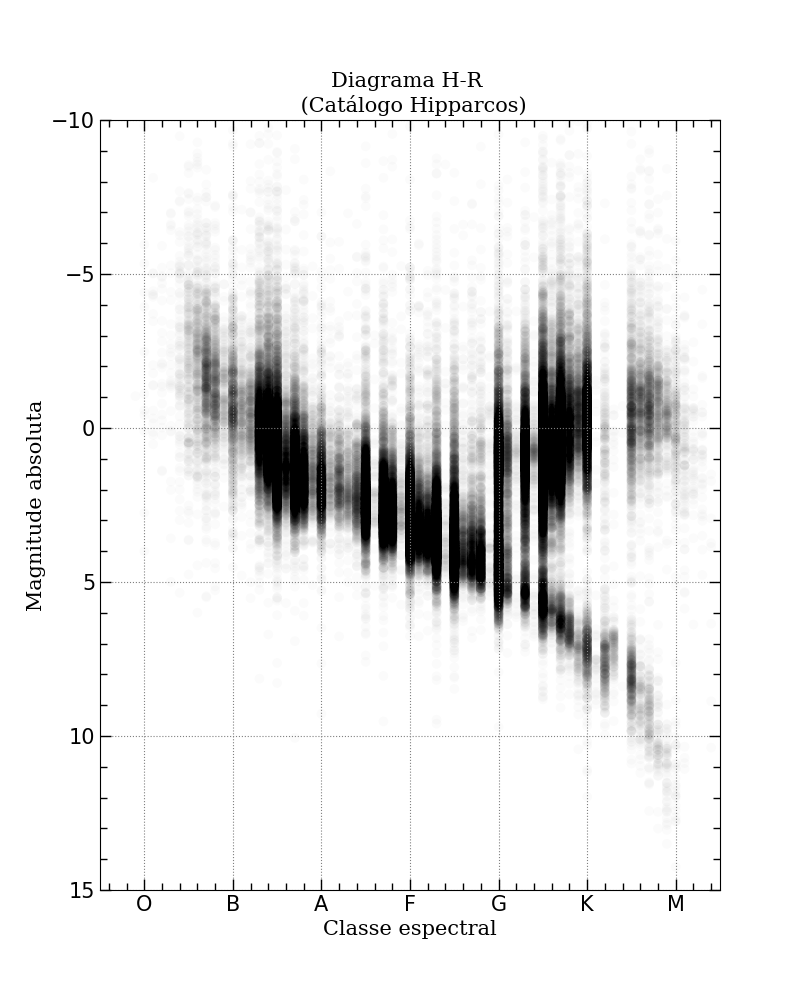

In [21]:
plt.figure(figsize=(8,10))

plt.title('Diagrama H-R \n (Catálogo Hipparcos)', fontsize=15, family='serif')
plt.xlabel('Classe espectral', fontsize=15, family='serif')
plt.ylabel('Magnitude absoluta', fontsize=15, family='serif')
plt.xlim(0, 70)
plt.ylim(15, -10)

plt.scatter(df_clean['SpType2'].astype(np.int64), df_clean['M_V'],
           s=50, edgecolors='none', alpha=0.015, c='k')
plt.xticks(range(5,75,10))
plt.xticks([5, 15, 25, 35, 45, 55, 65], ['O', 'B', 'A', 'F', 'G', 'K', 'M'])
opt_plot()

# plt.savefig('Diagrama H-R (Catálogo Hipparcos) - Classe espectral.png')

O diagrama acima não é muito satisfatório, no sentido de que, como o eixo horizontal corresponde a um conjunto discreto de valores (as diferentes classes espectrais), as bandas verticais são formadas pelo acúmulo de observações nesses valores. Seria preferível usar uma escala contínua de valores decimais. Por esse motivo, o diagrama será repetido usando o índice de cores B-V em vez de classes espectrais. Além disso, isso nos permitirá verificar que ambas as representações possuem a mesma forma, confirmando a relação entre as classes espectrais e os índices de cor.

<IPython.core.display.Javascript object>


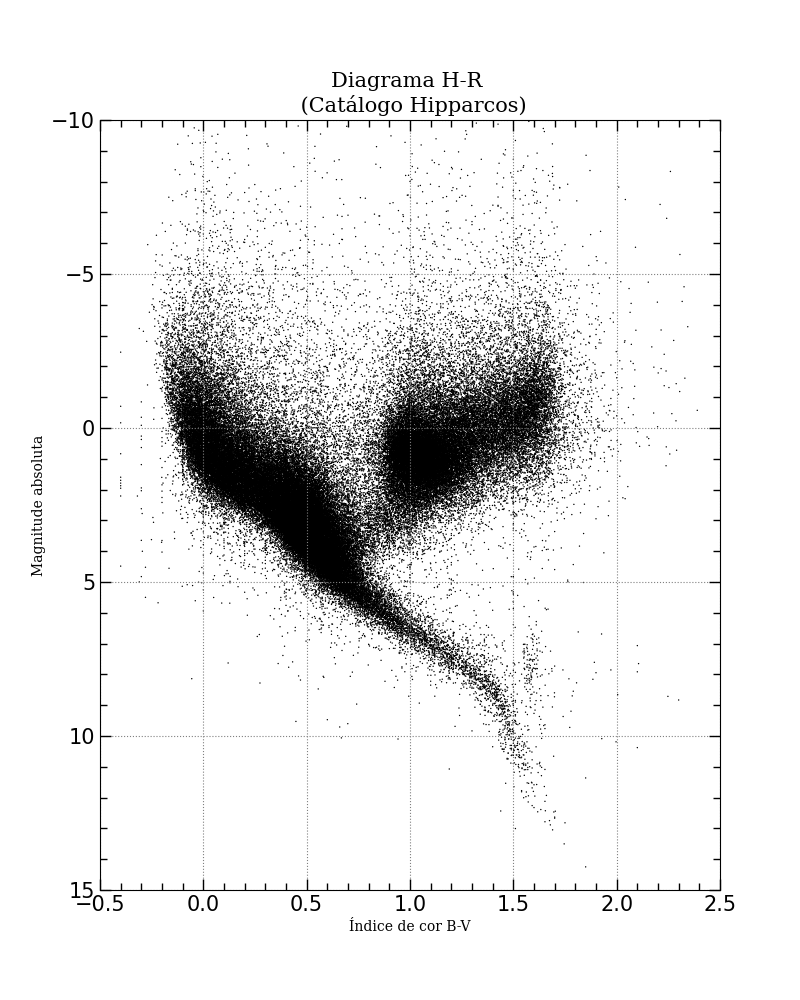

In [22]:
plt.figure(figsize=(8,10))

plt.title('Diagrama H-R \n (Catálogo Hipparcos)', fontsize=15, family='serif')
plt.xlabel('Índice de cor B-V', fontsize=10, family='serif')
plt.ylabel('Magnitude absoluta', fontsize=10, family='serif')
plt.xlim(-0.5, 2.5)
plt.ylim(15, -10)

plt.scatter(df_clean['B-V'], df_clean['M_V'],
#           s=50, edgecolors='none', alpha=0.015, c='k')
            s=1, edgecolors='none', c='k')
opt_plot()

# plt.savefig('Diagrama H-R (Catálogo Hipparcos) - Índice de cor.png')

### 2.3 Classes de luminosidade

Além do tipo espectral OBAFGKM, muitas estrelas do catálogo Hipparcos contêm, na codificação do tipo de espectro (`SpType`), a classe de luminosidade em algarismo romanos: I a VII, que indicam o tipo de estrela em questão. Uma explicação deste sistema de classificação pode ser lida no artigo da Britannica: [Stellar classification](https://www.britannica.com/science/stellar-classification) [7].  

A presença dessas classes de brilho no catálogo será analisada a seguir:

In [23]:
f = lambda s: 'VII' in s
b = df_clean['SpType'].map(f)
print('Classe VII: Anãs brancas, há %d estrelas.' %sum(b))

f = lambda s: ('VI' in s) and ('VII' not in s)
b = df_clean['SpType'].map(f)
print('Classe VI: Sub-anãs, há %d estrelas.' %sum(b))

f = lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s)
b = df_clean['SpType'].map(f)
print('Classe V: Sequência principal, há %d estrelas.' %sum(b))

f = lambda s: 'IV' in s
b = df_clean['SpType'].map(f)
print('Classe IV: Subgigantes, há %d estrelas.' %sum(b))

f = lambda s: 'III' in s
b = df_clean['SpType'].map(f)
print('Classe III: Gigantes brilhantes, há %d estrelas.' %sum(b))

f = lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s)
b = df_clean['SpType'].map(f)
print('Classe II: Gigantes brilhantes, há %d brilhantes.' %sum(b))

f = lambda s: ('I' in s) and ('II' not in s) and ('V' not in s)
b = df_clean['SpType'].map(f)
print('Classe I: Supergigantes, há %d brilhantes.' %sum(b))

Classe VII: Anãs brancas, há 1 estrelas.
Classe VI: Sub-anãs, há 16 estrelas.
Classe V: Sequência principal, há 24683 estrelas.
Classe IV: Subgigantes, há 7955 estrelas.
Classe III: Gigantes brilhantes, há 22519 estrelas.
Classe II: Gigantes brilhantes, há 1239 brilhantes.
Classe I: Supergigantes, há 937 brilhantes.


Como se pode ver abaixo, cerca de metade das estrelas não tem uma classe de luminosidade codificada no campo `SpType`:

In [24]:
f = lambda s: ('I' not in s) and ('V' not in s)
b = df_clean['SpType'].map(f)
print(sum(b))

55605


No entanto, há um número significativo de entradas no catálogo que contém informações sobre a classe estelar, portanto, a posição ocupada por cada uma dessas classes de luminosidade no diagrama H-R será mostrada abaixo.

In [25]:
def plot_lum_class(b, c, label):
    '''
    - Inputs:
    1) b : Série booleana para realizar a seleção.
    2) c : Cor do gráfico.
    3) label : Etiqueta para a legenda.
    '''
    
    x = df_clean['B-V'][b]
    y = df_clean['M_V'][b]
    plt.scatter(x, y, c = c, s=6, edgecolors = 'none', label = label)

Agora vamos plotar o nosso diagrama H-R usando os índices de cor e fazendo as separações entre classes espectrais:

<IPython.core.display.Javascript object>


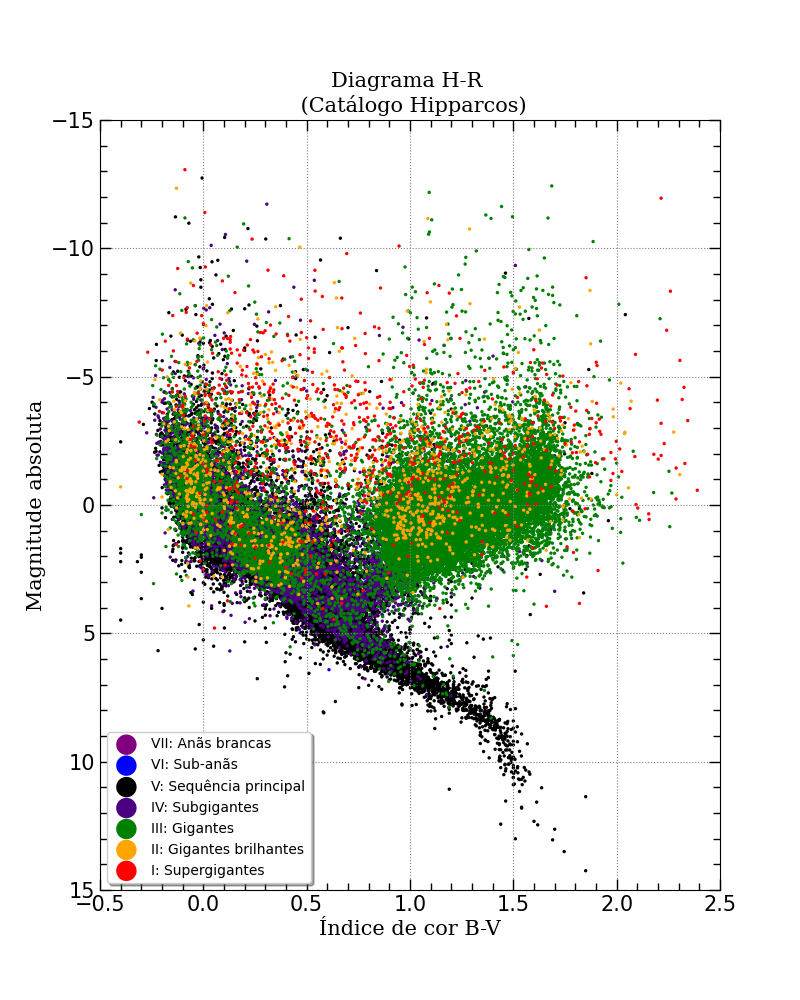

In [26]:
plt.figure(figsize=(8,10))

plt.title('Diagrama H-R \n (Catálogo Hipparcos)', fontsize=15, family='serif')
plt.xlabel('Índice de cor B-V', fontsize=15, family='serif')
plt.xlim(-0.5, 2.5)
plt.ylabel('Magnitude absoluta', fontsize=15, family='serif')
plt.ylim(15, -15)


f = lambda s: 'VII' in s
b = df_clean['SpType'].map(f)
plot_lum_class(b, 'purple', 'VII: Anãs brancas')

f = lambda s: ('VI' in s) and ('VII' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b, 'blue', 'VI: Sub-anãs')

f = lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b, 'black', 'V: Sequência principal')

f = lambda s: 'IV' in s
b = df_clean['SpType'].map(f)
plot_lum_class(b, 'indigo', 'IV: Subgigantes')

f = lambda s: 'III' in s
b = df_clean['SpType'].map(f)
plot_lum_class(b, 'green', 'III: Gigantes')

f = lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b, 'orange', 'II: Gigantes brilhantes')

f = lambda s: ('I' in s) and ('II' not in s) and ('V' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b, 'red', 'I: Supergigantes')


plt.tick_params(axis='both', labelsize=15)
plt.legend(scatterpoints=1, markerscale = 6, shadow=True)
opt_plot()

# plt.savefig('Diagrama H-R (Catálogo Hipparcos) - Índice de cor + Classes espectrais.png')

## 3. Melhorando a estética dos diagramas

Agora que o leitor já é conhecedor das técnicas relativas à construção de um diagrama H-R, vamos aumentar um pouco o nível. Tentaremos melhorar a estética dos nossos diagramas. Existem várias maneiras de se melhorar esteticamente os plots feitos em `Python`, clicando [aqui](https://matplotlib.org/stable/tutorials/index.html) você pode conferir uma série de tutoriais mostrando as diferentes formas de se realizar e melhorar a estética dos plots feitos com a biblioteca `matplotlib` do `Python`.

Entretanto, aqui eu irei optar por um caminho diferente. Vamos construir um diagrama H-R com uma estética melhorada com relação ao anterior.

Dessa forma, como na seção anterior já foi feita toda uma longa explanação acerca da forma na qual se constriu um diagrama H-R, vamos assumir que ao chegar até aqui o leitor já leu as seções anteriores, ou seja, iremos passar de forma rápida pelos passos intermediários da construção do diagrama, destacando apenas os pontos principais, sem detalhá-los demais como foi feito na seção anterior. Portanto, caso o leitor ainda não tenha lido e exercitado as duas seções anteriores, recomenda-se que o mesmo o faça e somente após feito isso que retorne para esta seção, uma vez que esta seção visa servir como um complemento da seção anterior.

### O banco de dados HYG

O banco de dados HYG (`v3.0`) é uma compilação de dados estelares interessantes de uma variedade de catálogos. É útil para obter informações básicas sobre todos os tipos de dados: nomes de estrelas, posições, brilhos, distâncias e informações de espectro. 

Existem pelo menos três versões do banco de dados HYG. Abaixo você pode conferir as versões do banco de dados e então escolher aquela que melhor atende às suas necessidades:

- [HYG 3.0](http://www.astronexus.com/downloads/catalogs/hygdata_v3.csv.gz): banco de dados contendo todas as estrelas nos catálogos *Hipparcos*, *Yale Bright Star* e *Gliese* (quase 120.000 estrelas, 14 MB);
- [HYG 2.0](http://www.astronexus.com/downloads/catalogs/hygxyz.csv.gz): versão mais antiga do banco de dados *Hipparcos* / *Yale* / *Gliese* completo (quase 120.000 estrelas, 9 MB)
- [HYG v 1.1](http://www.astronexus.com/downloads/catalogs/hygxyz.csv.gz): banco de dados contendo todas as estrelas mais brilhantes do que magnitude + 9,0 ou mais próximas do que 50 parsecs. (87476 estrelas).

O banco de dados é um subconjunto dos dados em três catálogos principais: o Catálogo Hipparcos, o Catálogo Yale Bright Star (5ª Edição) e o Catálogo Gliese de Estrelas Próximas (3ª Edição). Cada um desses catálogos contém informações úteis para astrônomos amadores:

- **Hipparcos**: é a maior coleção de dados posicionais estelares de alta precisão, particularmente paralaxes, o que o torna útil como ponto de partida para dados de distância estelar.

- **Yale Bright Star**: contém dados básicos sobre essencialmente todas as estrelas a olho nu, incluindo muitas informações (como as letras gregas Bayer tradicionais e os números Flamsteed) ausentes em muitos outros catálogos.

- **Gliese**: é o catálogo mais completo de estrelas próximas (aquelas a 75 anos-luz do Sol). Ele contém muitas estrelas mais fracas não encontradas em Hipparcos.

O nome da base de dados provém dos três catálogos que compõem seus dados: **H**ipparcos, **Y**ale e **G**liese.

Ao todo, este banco de dados contém todas as estrelas que são mais brilhantes do que um determinado corte de magnitude (magnitude + 7,5 a + 9,0) ou dentro de 50 parsecs (cerca de 160 anos-luz) do Sol. A versão atual, `v.3.0`, não possui um corte de magnitude: qualquer estrela no Hipparcos, Yale ou Gliese é representada.

O banco de dados é um arquivo de valores separados por vírgula (CSV) que pode ser importado para a maioria dos programas de banco de dados e planilhas.

Você pode baixar os dados como um arquivo ZIP ou GZ, que pode ser aberto pela maioria dos descompactadores populares no site da [*Astronomy Nexus*](http://www.astronexus.com/hyg) [8] ou pode baixar o arquivo CSV direto do repositório no [GitHub](https://github.com/astronexus/HYG-Database). Neste site você pode inclusive encontrar uma descrição detalhada acerca do banco de dados HYG, como os campos presentes no banco de dados, como foi feita a construção do mesmo, dentre outras informações.

### 3.2 Baixando e limpando os dados

A partir daqui vamos assumir que o leitor baixou o arquivo `hygdata_v3.csv` e o armazenou na mesma pasta na qual está salvo o `Notebook`. 

In [27]:
df = pd.read_csv('hygdata_v3.csv')[['absmag', 'ci']]
df.dropna(inplace=True) # dropamos 1882 linhas;

print('%i linhas' % len(df))
df.head(3)

117732 linhas


,absmag,ci
0,4.850,0.656
1,2.390,0.482
2,5.866,0.999


### 3.3 Explorando os dados

A biblioteca `Seaborn` é muito mais fácil para esse tipo de plotagem, então vamos deixar a biblioteca `matplotlib` de fora por um tempo (mas não por muito tempo).

<IPython.core.display.Javascript object>


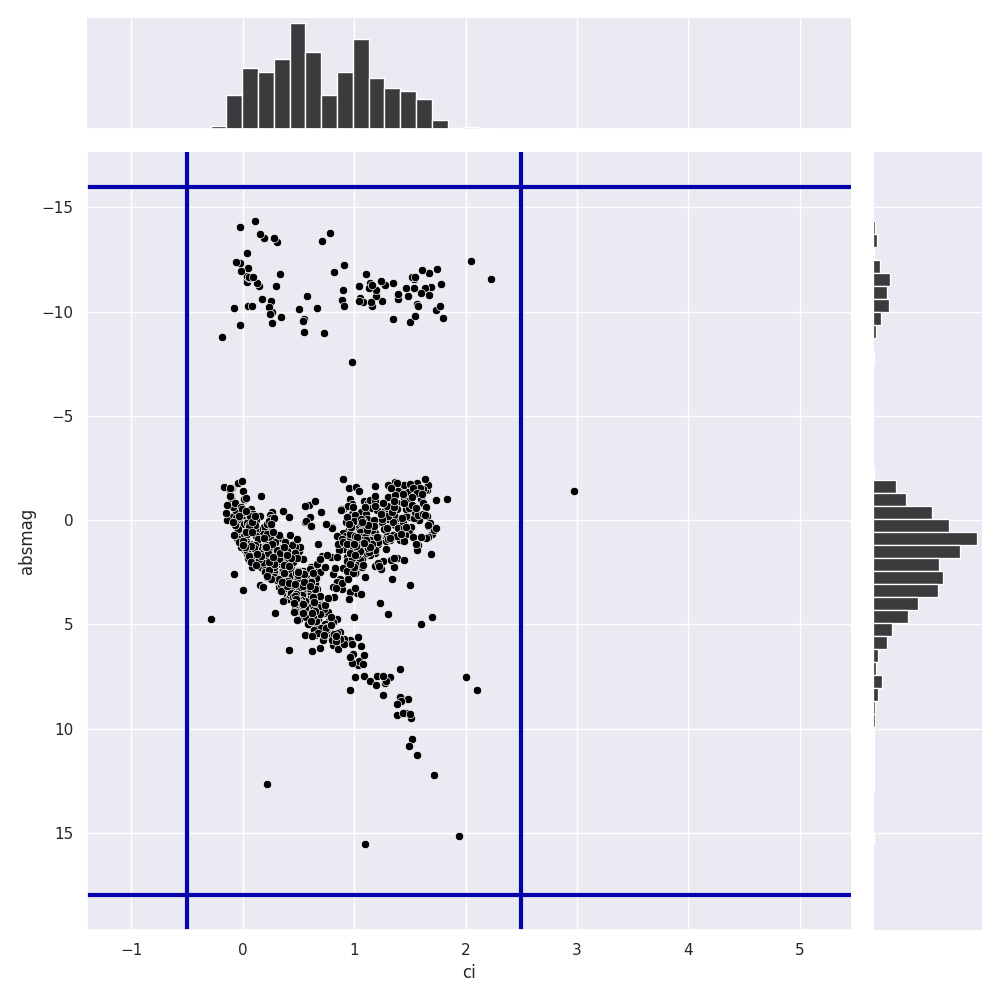

In [28]:
# Lembre que 'sns' é a biblioteca Seaborn:
sns.set(style="darkgrid")

xlim = (min(df['ci']) - 1, max(df['ci']))
ylim = (max(df['absmag']) + 1, min(df['absmag']) - 1)  # invertemos o eixo y; 

ax = sns.jointplot(x = "ci", y = "absmag", data = df.sample(1000), color='black', 
    xlim = xlim, ylim = ylim,
    height = 10, ratio = 6)

for x, y in [([2.5, 2.5], ylim), ([-.5, -.5], ylim), (xlim, [18, 18]), (xlim, [-16, -16])]:
    ax.ax_joint.plot(x, y, sns.xkcd_rgb["royal blue"], lw = 3)
    
# plt.savefig('Diagrama H-R (HYG) + Histogramas.png')

Note que os gráficos de barras que aparecem na parte superior e no lado direito do gráfico original são histogramas das quantidades apresentadas no mesmo. A distribuição dos pontos de dados em ambas as variáveis permite a definição de pontos de corte delimitando as zonas de alta densidade de dados. Os pontos pertencentes a essas regiões serão plotados, descartando o restante como outliers. 

### 3.4 Plotando os dados

<IPython.core.display.Javascript object>


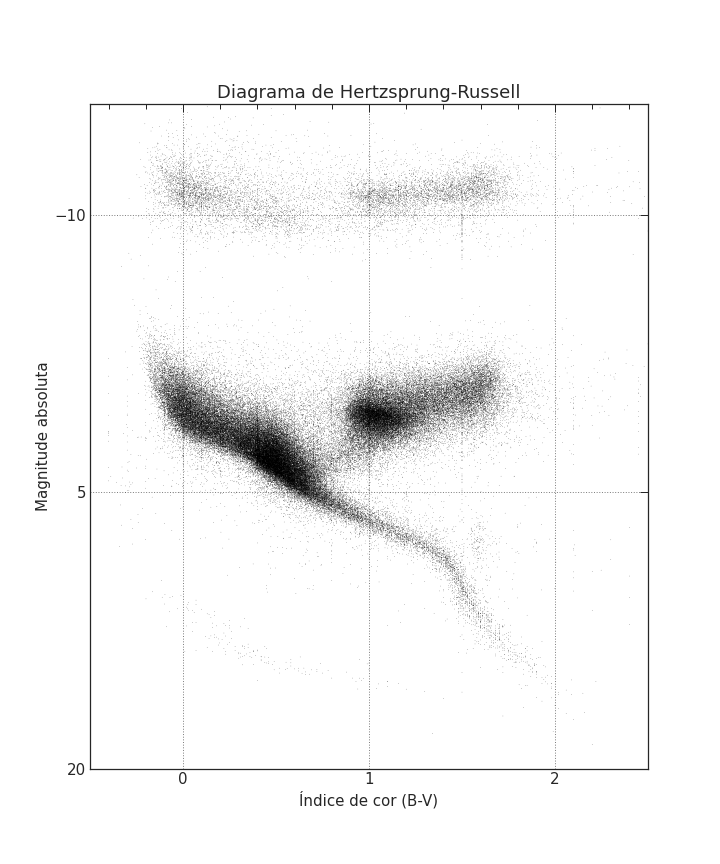

In [29]:
sns.set(style="white")

plt.figure(figsize=(10, 12), dpi=72)

plt.title('Diagrama de Hertzsprung-Russell', fontsize=18)
plt.xlabel('Índice de cor (B-V)', fontsize=15)
plt.ylabel('Magnitude absoluta', fontsize=15)

plt.scatter(df['ci'], df['absmag'], marker='.', s=[1] * len(df), facecolors='black', linewidth = 0)

plt.xlim(-.5, 2.5)
plt.xticks(np.linspace(0, 2, 3, endpoint=True))
plt.ylim(18, -16)
plt.yticks(np.linspace(20, -10, 3, endpoint=True))

opt_plot()

# plt.savefig("Diagrama de Hertzsprung-Russell (HYG).png", dpi=72)

### 3.4 Estilizando os dados

#### 3.4.1 $(B-V)$ para Kelvin

Vamos converter o índice de cores B-V para o sistema de cores RGB (sRBG). Para isso, vamos primeiro converter o índice B-V para Kelvin. Isso pode ser feito mediante a seguinte equação:

$$\boxed{T=4600\Bigg[\frac{1}{0.92(B-V)+1.7}+\frac{1}{0.92(B-V)+0.62}\Bigg]}$$

#### 3.4.2 Kelvin para $xyY$

Em seguida vamos converter de Kelvin para $xyY$. Se modelarmos uma estrela como um corpo negro, podemos usar uma aproximação numérica do lugar geométrico de Planck (*Planckian locus*) para calcular as coordenadas $xy$ (cromaticidade CIE).

![image](https://media.giphy.com/media/f1mr7xl7nNRaF06Vls/giphy.gif)

As equações condicionais que iremos utilizar para realizar a conversão serão as seguintes:

$$\boxed{x_{c} = \left\{\begin{matrix} -0.2661239\frac{10^{9}}{T^{3}}-0.2343580\frac{10^{6}}{T^{2}}+0.8776956\frac{10^{3}}{T}+0.179910,& \mathrm{se\ }& 1667\text{ K}\leq T\leq4000\text{ K} \\ -3.0258469\frac{10^{9}}{T^{3}}+2.1070379\frac{10^{6}}{T^{2}}+0.2226347\frac{10^{3}}{T}+0.240390,& \mathrm{se }& 4000\text{ K}\leq T\leq25000\text{ K} \end{matrix} \right.}$$ 

$$\boxed{y_{c} = \left\{\begin{matrix} -1.1063814x_{c}^{3}-1.34811020x_{c}^{2}+2.18555832x_{c}-0.20219683,& \mathrm{se\ }& 1667\text{ K}\leq T\leq2222\text{ K} \\ -0.9549476x_{c}^{3}-1.37418593x_{c}^{2}+2.09137015x_{c}-0.16748867,& \mathrm{se }& 2222\text{ K}\leq T\leq4000\text{ K} \\ +3.0817580x_{c}^{3}-5.87338670x_{c}^{2}+3.75112997x_{c}-0.37001483, &\mathrm{se }& 4000\text{ K}\leq T\leq25000\text{ K} \end{matrix} \right.}$$ 

Você pode checar uma aula completa sobre o tema no site [*Moviola*](https://moviola.com) [9] ou clicando [aqui](https://moviola.com/technique/color-science-basics-for-filmmakers/). O curso do *Moviola* é voltado para aspirantes a cineastas, entretanto, o mesmo serve como uma boa introdução à ciência das cores.

#### 3.4.3 $xyY$ para $XYZ$ $(Y=1)$

Em seguida, vamos converter do sistema $xyY$ para o espaço de cores CIE 1931, ou seja, vamos converter para o sistema $XYZ$ com $Y=1$. As equações de conversão que iremos utilizar serão as seguintes:

$$\boxed{X=\frac{Y}{y}x}$$

$$\boxed{Z=\frac{Y}{y}(1-x-y)}$$

Você pode checar um artigo da *Medium* de introdução à colorimetria CIE na referência [10] ou clicando [aqui](https://medium.com/hipster-color-science/a-beginners-guide-to-colorimetry-401f1830b65a) e um artigo sobre o espaço de cores CIE 1931 na referência [11] ou clicando [aqui](https://www.hisour.com/cie-1931-color-space-24840/).

#### 3.4.4 $XYZ$ para RGB

Finalmente, vamos agora converter, ainda dentro do espaço de cores CIE 1931, do sistema $XYZ$ para o sistema RBG. Para isso, vamos utilizar a matriz de conversão do sRBG:

$$\boxed{\begin{bmatrix}
R_{\text{linear}} \\ 
G_{\text{linear}} \\
B_{\text{linear}} \\ 
\end{bmatrix}= 
\begin{bmatrix} 3.2406 & -1.5372 & -0.4986 \\
-0.9689 & 1.8758 & 0.0415 \\ 
0.0557 & -0.2040 & 1.0570 \\
\end{bmatrix} 
\begin{bmatrix}X \\
Y \\
Z \\
\end{bmatrix}}$$

Além disso, aqui estamos usando a função de correção gamma ajustada para melhores resultados:

$$\boxed{C_{\text{sRGB}} = \left\{\begin{matrix} 12.92\cdot C_{\text{linear}},& \mathrm{se\ }& C_{\text{linear}}\leq0.0031308 \\ (1+a)C_{\text{linear}}^{1/2.4}-a,& \mathrm{se }& C_{\text{linear}}>0.0031308 \end{matrix} \right.}$$ 

Normalmente a função de correção gamma é usada com `a = 0.055`, ou com `a = 0.5` mas estendendo a faixa dos índices de cores B-V para 4.7 a -0.5. No primeiro caso obtemos uma bela rampa de cores, entretanto nossa rampa de cores não possuirá vermelho ou violeta nas extremidades.

No segundo caso, obtém-se uma rampa de cores maior com o vermelho em uma das extremidades mas não se obtem o violeta na outra.

- `a = 0.055`:

![image](https://media.giphy.com/media/uCaaFdEt2ejgFRkB80/giphy.gif)

- `a = 0.5`:

![image](https://media.giphy.com/media/M1hH0G5KdExQpVJoEn/giphy.gif)

Uma solução rápida e pratica para esse problema é gerar três listas ordenadas (`n = 391`) a partir dos dados da tabela RBG. Existem diversos métodos para realizar tal tarefa e que não será apresentado neste `Notebook` para não desfocarmos demais de nosso objetivo principal. Tal discussão ficará para um `Notebook` futuro (se paciência e força de vontade para elaborar tal `Notebook`, uma vez que o método mais prático é relativamente complexo e necessita de uma série de outra ferramentas). A partir deste método, é possível extrair dados de cores de outras tabelas que podem usar CMYK ou HSV e se adaptar de acordo. Aplicar uma suavização gaussiana nas listas resultantes ajuda a obter melhores polinômios, uma vez que a mesma elimina algumas flutuações. Por fim, uma regressão polinomial (você pode usar a função [polyfit()](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html#numpy.polyfit) do `Numpy` para lhe auxiliar nesta tarefa) lhe retornará os valores da temperatura com relação aos valores R, G e B. Esse processo lhe retornará $n$ coeficientes $a$ para polinômios na da forma padrão.

Outra alternativa seria usar a regressão polinomial para chegar aos coeficientes para converter CI direto para RGB, isso pularia a etapa de conversão de temperatura. Entretanto, convertendo para temperatura primeiro, a relação entre a temperatura e o valor escolhido no espaço de cores é mais claro (trocadilhos à parte).

A escala de temperatura do corpo negro OBAFGKM para $k=20$ polinômios é a que está expressa abaixo:

![image](https://media.giphy.com/media/HfHKn1VFNdgsIwpe3S/giphy.gif)

Note que para $k=20$ polinômios obtemos uma rampa de cores com o vermelho em uma de suas extremidades e um azul que tende muito ligeiramente para o violeta na outra. Para obter o violeta você pode aumentar o número $k$ de polinômios usados. Com base nisso, você poderá localizar o violeta no sRGB (cheque a referência [12] ou clique [aqui](https://jila.colorado.edu/~ajsh/colour/rainbow.html) para mais detalhes sobre como localizar o violeta). Para a surpresa de muitos, o custo computacional não chega a ser significativo, uma vez que ao carregar cerca de 120.000 objetos estelares em um mapa estelar com no mínimo 18 vértices coloridos cada, o tempo gasto para isso (pelo menos no meu computador) é da ordem de alguns poucos segundos. 

Obviamente que há um enorme espaço para melhorias nesse modelo, uma vez que o mesmo apenas usa a radiação de luz de corpo negro. Um modelo mais realista deveria incluir diversos outros fatores como lentes gravitacionais, efeitos atmosféricos, efeito Doppler relativístico, etc. Entretanto, para um modelo básico, este é um bom resultado.

#### 3.4.5 Voltando ao código...

Agora que já temos posse das equações que nos permitirão realizar a conversão do índice de cor B-V para o sRGB, vamos implemetar nosso método computacionalmente. Para isso, vamos definir uma função que irá realizar todo o trabalho de conversão:

In [30]:
def bv2rgb(bv):
    t = (5000 / (bv + 1.84783)) + (5000 / (bv + .673913))
    x, y = 0, 0
    
    if 1667 <= t <= 4000:
        x = .17991 - (2.66124e8 / t**3) - (234358 / t**2) + (877.696 / t)
    elif 4000 < t:
        x = .24039 - (3.02585e9 / t**3) + (2.10704e6 / t**2) + (222.635 / t)
        
    if 1667 <= t <= 2222:
        y = (-1.1063814 * x**3) - (1.34811020 * x**2) + 2.18555832 * x - .20219683
    elif 2222 < t <= 4000:
        y = (-.9549476 * x**3) - (1.37418593 * x**2) + 2.09137015 * x - .16748867
    elif 4000 < t:
        y = (3.0817580 * x**3) - (5.87338670 * x**2) + 3.75112997 * x - .37001483
        
    X = 0 if y == 0 else x / y
    Z = 0 if y == 0 else (1 - x - y) / y
    
    r, g, b = np.dot([X, 1., Z],
        [[3.2406, -.9689, .0557], [-1.5372, 1.8758, -.204], [-.4986, .0415, 1.057]])
    
    R = np.clip(12.92 * r if (r <= 0.0031308) else 1.4 * (r**2 - .285714), 0, 1)
    G = np.clip(12.92 * g if (g <= 0.0031308) else 1.4 * (g**2 - .285714), 0, 1)
    B = np.clip(12.92 * b if (b <= 0.0031308) else 1.4 * (b**2 - .285714), 0, 1)
    
    return [R, G, B, np.random.ranf()]

Agora realizamos a conversão propriamente dita:

In [31]:
color = df['ci'].apply(bv2rgb)

Agora vamos plotar o nosso novo diagrama H-R e avaliar o resultado:

<IPython.core.display.Javascript object>


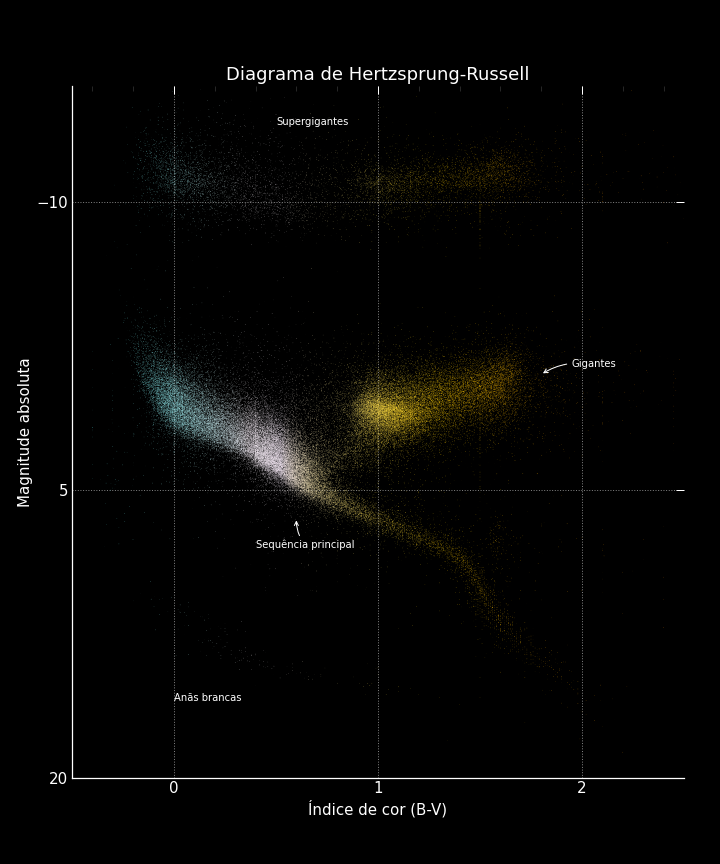

In [32]:
fig = plt.figure(figsize=(10, 12), facecolor='black', dpi=72)
ax = fig.add_axes([.1, .1, .85, .8])

ax.set_facecolor('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Diagrama de Hertzsprung-Russell', color='white', fontsize=18)
ax.title.set_position([.5, 1.03])
ax.set_xlabel('Índice de cor (B-V)', color='white', fontsize=15)
ax.set_ylabel('Magnitude absoluta', color='white', fontsize=15)

ax.scatter(df['ci'], df['absmag'], marker='.', s=[1] * len(df), facecolors=color, linewidth=0)

ax.set_xlim(-.5, 2.5)
ax.set_xticks(np.linspace(0, 2, 3, endpoint=True))
ax.set_ylim(18, -16)
ax.set_yticks(np.linspace(20, -10, 3, endpoint=True))
ax.tick_params(top='off', right='off', direction='out', colors='white')

ax.annotate('Sequência principal', xy=(.6, 6.5), xycoords='data',
    fontsize='small', color='white',
    xytext=(-40, -30), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=-.2",
        color='white'))

ax.annotate('Gigantes', xy=(1.8, -1), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=.2",
        color='white'))

ax.annotate('Supergigantes', xy=(.5, -14), xycoords='data',
    fontsize='small', color='white')

ax.annotate('Anãs brancas', xy=(0, 16), xycoords='data',
    fontsize='small', color='white');

opt_plot()

# plt.savefig("Diagrama de H-R (HYG) estilizado.png", facecolor='black', edgecolor='white', dpi=72)

Realmente, converter os dados dos índices de cores para o sRBG melhora MUITO a estética do diagrama H-R. 

Apesar de termos feito esse processo de conversão de cores para o diagrama H-R, você pode realizar um processo para praticamente qualquer tipo de plot, basta você saber quais dados você deverá realizar a conversão para o sRBG. Obviamente, na maioria das vezes essa conversão não é trivial.

$\blacksquare$

## Referências

- [1] *SDSS SkyServer - The Hertzsprung-Russel Diagram* : http://skyserver.sdss.org/dr16/en/proj/advanced/hr/hrhome.aspx

- [2] *A cor dos objetos celestes* : https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20cor%20dos%20objetos%20celestes.ipynb

- [3] *ESA - Hipparcos overview* : https://www.esa.int/Science_Exploration/Space_Science/Hipparcos_overview

- [4] *HIPPARCOS - Hipparcos Main Catalog* : https://heasarc.gsfc.nasa.gov/W3Browse/all/hipparcos.html

- [5] *Cosmos - Absolute Magnitude* :
https://astronomy.swin.edu.au/cosmos/A/Absolute+magnitude

- [6] *VizieR Search Page* : http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/239/hip_main

- [7] *Britannica - Stellar classification* : https://www.britannica.com/science/stellar-classification

- [8] *Astronomy Nexus - HYG Star Databse Archive* : http://www.astronexus.com/hyg

- [9] *Color Science Basics For Filmmakers* : https://moviola.com/technique/color-science-basics-for-filmmakers/

- [10] *A Beginner’s Guide to (CIE) Colorimetry* : https://medium.com/hipster-color-science/a-beginners-guide-to-colorimetry-401f1830b65a

- [11] *CIE 1931 Color Space* : https://www.hisour.com/cie-1931-color-space-24840/

- [12] *Where’s purple? Or, how to plot colours properly on a computer screen* : https://jila.colorado.edu/~ajsh/colour/rainbow.html